This notebook is made for the cleaning of aspects' texts. <hr>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [3]:
df_aspects = pd.read_csv("data/aspects.csv")
df_aspects.head()

,aspectId,description,type,groupId,categoryId
0,1,To enable them on this domain,CONCEPT,1067.0,NaN
1,2,To enable competences for smoke tests,CONCEPT,48.0,NaN
2,4,Die Antwort wurde in einem Satz gegeben.,CONCEPT,674.0,NaN
3,17,"Es wurde erkannt, dass die Schafe vorzeitig in...",CONCEPT,95.0,NaN
4,18,"Es wurde erkannt, dass in Schweden der Erhalt ...",CONCEPT,73.0,NaN


In [4]:
df_aspects.type.unique()

array(['CONCEPT', 'MISCONCEPTION'], dtype=object)

In [5]:
df_concept_aspects = df_aspects[df_aspects["type"] == "CONCEPT"]

<hr>

In [6]:
df_TaskAspect = pd.read_csv("data/taskAspects.csv")
df_TaskAspect.head()

,id,taskId,aspectId,sampleSolution
0,3,5ElPCuVMbAy8pzupzU7R3x,2,NaN
1,54,2VX1HHa4SZp9Cs6Suof4ho,1,NaN
2,74,2j6rJkYxYa98ydGaSCW17D,4,NaN
3,75,2j6rJkYxYa98ydGaSCW17D,20,"{""type"": ""DEFAULT"", ""sampleSolutionGroups"": [{..."
4,76,2j6rJkYxYa98ydGaSCW17D,21,"{""type"": ""DEFAULT"", ""sampleSolutionGroups"": [{..."


In [7]:
len(df_TaskAspect)

117604

**Distribution of DE aspects**

In [8]:
df_tasks = pd.read_csv("data/open_tasks_DE.csv")
df = pd.merge(df_tasks[["taskId"]], df_TaskAspect[["taskId", "aspectId"]], how="inner", on=["taskId"])
df.head()

,taskId,aspectId
0,9Aa4h4yosMb9oAglIYVbMr,9222
1,9Aa4h4yosMb9oAglIYVbMr,9226
2,9Aa4h4yosMb9oAglIYVbMr,9232
3,9Aa4h4yosMb9oAglIYVbMr,9236
4,2T3rZTRBlAv94jV8YNcbgq,9703


In [9]:
len(df), len(df.aspectId.unique()), len(df_tasks)

(13094, 2271, 1730)

In [10]:
# Aspects of type CONCEPT only 
df2 = pd.merge(df, df_concept_aspects[["aspectId"]], how="inner", on=["aspectId"]) 
df2.head()

,taskId,aspectId
0,9Aa4h4yosMb9oAglIYVbMr,9226
1,9Aa4h4yosMb9oAglIYVbMr,9236
2,2T3rZTRBlAv94jV8YNcbgq,9707
3,2T3rZTRBlAv94jV8YNcbgq,9709
4,2T3rZTRBlAv94jV8YNcbgq,9713


In [11]:
len(df2), len(df2.aspectId.unique())

(4814, 872)

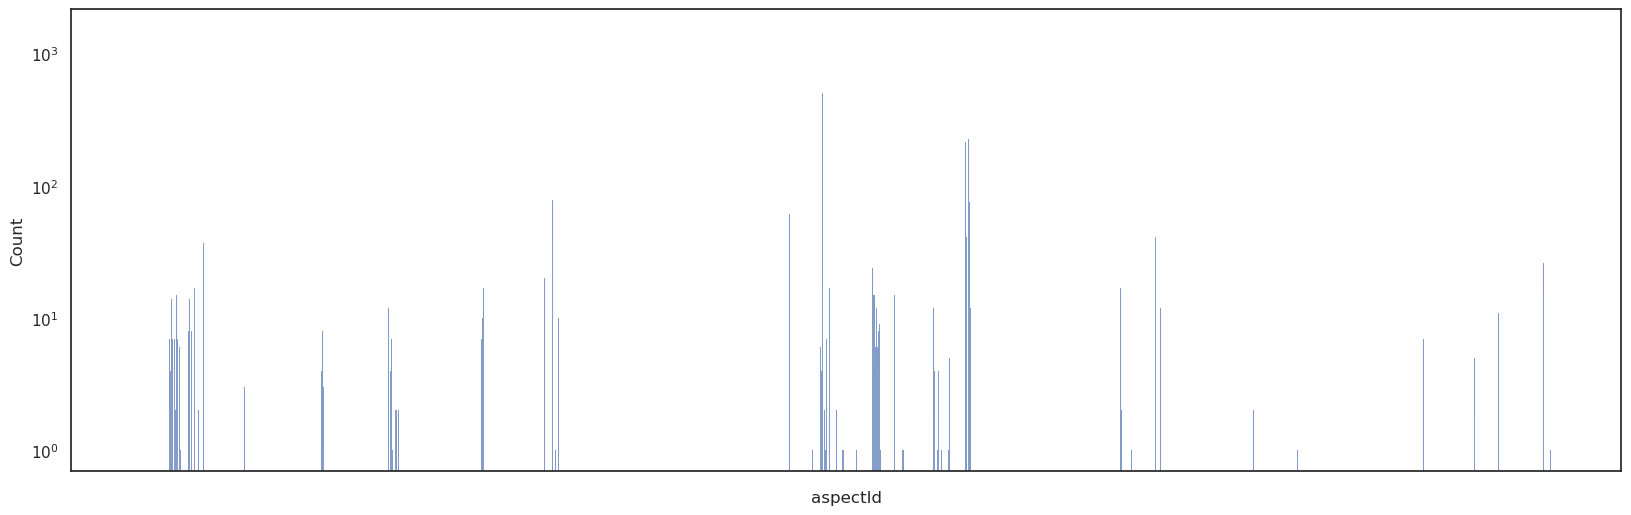

In [12]:
sns.set_theme(style='white', 
              rc={'figure.figsize':(20,6)})
ax = sns.histplot(data=df2,
                  x="aspectId",
                  bins = len(df.aspectId.unique()),
                  shrink=0.9)
ax.set_yscale("log")

xlabels = ax.set_xticklabels([''])

> A big number of aspects appear only once. So they are very task-spectific, and we should remove them to make the dataset more general/representative. 

In [13]:
# Count of tasks by aspect - Inspecting those that appear once 
d = df2.groupby("aspectId").count().reset_index().rename(columns={"taskId":"tasks_count"})
d["tasks_count"].sum(), len(d)

(4814, 872)

In [14]:
# Remove aspects that appear once, because very task-specific 
d = d[d['tasks_count'] > 1 ]
L = len(df2) 
l = len(d)
print("Removed aspects represent {:.2f}% of the original set.".format( (L-l) / L * 100) ) 
d["tasks_count"].sum(), len(d)

Removed aspects represent 95.93% of the original set.


(4138, 196)

In [15]:
remained_aspects = d["aspectId"].unique()
df = df[df["aspectId"].isin(remained_aspects)]

In [16]:
df.to_csv("data/taskAspects_DE.csv", index_label=False)

In [17]:
d_aspects = pd.merge(df[["aspectId"]].drop_duplicates(), df_aspects, how="inner", on=["aspectId"])
d_aspects.to_csv("data/concept_aspects_DE.csv", index_label=False)

**English tasks**

In [18]:
df_tasks = pd.read_csv("data/open_tasks_EN.csv")
df = pd.merge(df_tasks[["taskId"]], df_TaskAspect[["taskId", "aspectId"]], how="inner", on=["taskId"])
df.head()

,taskId,aspectId
0,8lxRyLzStOK9eUhNRal38O,9059
1,8lxRyLzStOK9eUhNRal38O,9065
2,8lxRyLzStOK9eUhNRal38O,9067
3,aazKG44PsKc5UnpTiDECut,9068
4,aazKG44PsKc5UnpTiDECut,9069


In [19]:
len(df), len(df.aspectId.unique())

(52542, 2394)

In [20]:
# Aspects of type CONCEPT only 
df2 = pd.merge(df, df_concept_aspects[["aspectId"]], how="inner", on=["aspectId"]) 
df2.head()

,taskId,aspectId
0,8lxRyLzStOK9eUhNRal38O,9065
1,aazKG44PsKc5UnpTiDECut,9069
2,8L1QdQwEG5XaRfdYKcLPed,9077
3,8L1QdQwEG5XaRfdYKcLPed,9575
4,14ambh1obhw7TYMQE8lcC1,9637


In [21]:
len(df2), len(df2.aspectId.unique())

(11610, 657)

In [23]:
# Count of tasks by aspect - Inspecting those that appear once 
d = df2.groupby("aspectId").count().reset_index().rename(columns={"taskId":"tasks_count"})
d["tasks_count"].sum(), len(d)

(11610, 657)

In [24]:
# Remove aspects that appear once, because very task-specific 
d = d[d['tasks_count'] > 1 ]
L = len(df2) 
l = len(d)
print("Removed aspects represent {:.2f}% of the original set.".format( (L-l) / L * 100) ) 
d["tasks_count"].sum(), len(d)

Removed aspects represent 97.68% of the original set.


(11222, 269)

In [25]:
remained_aspects = d["aspectId"].unique()
df = df[df["aspectId"].isin(remained_aspects)]

In [26]:
df.to_csv("data/taskAspects_EN.csv", index_label=False)

In [27]:
d_aspects = pd.merge(df[["aspectId"]].drop_duplicates(), df_aspects, how="inner", on=["aspectId"])
d_aspects.to_csv("data/concept_aspects_EN.csv", index_label=False)

<hr>